In [2]:
import pandas as pd
import plotly.graph_objects as go

In [3]:
covid_dat = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid_dat

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29376,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29377,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29378,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29379,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
tot_permil_630 = covid_dat[covid_dat['date']=='2020-07-09'].reset_index(drop=True)[:-1]

In [77]:
tot_permil_630['total_cases_per_million'].max()

35248.485

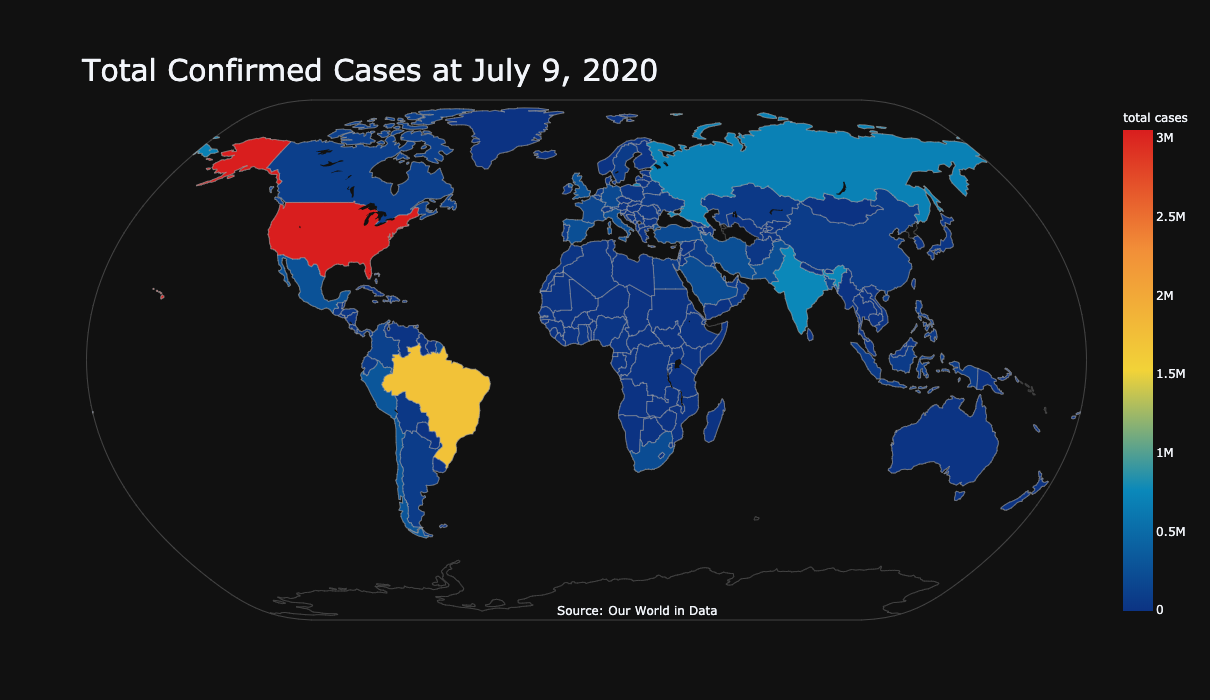

In [97]:
import plotly.io as pio
pio.templates.default = "plotly_dark"
var = 'total_cases'

tot_permil_630 = covid_dat[covid_dat['date']=='2020-07-09'].reset_index(drop=True)[:-1]
fig = go.Figure(data=go.Choropleth(
    locations = tot_permil_630['iso_code'],
    z = tot_permil_630[var],
    text = tot_permil_630['location'],
    colorscale = 'portland',
    #autocolorscale=True,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = ' '.join(var.split('_')),
))


fig.update_layout(
    height = 700,
    width = 1200,
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    annotations = [dict(
        x=0.55,
        y=0,
        xref='paper',
        yref='paper',
        text='Source: Our World in Data',
        showarrow = False
    ),
        # Modify the title properties
        dict(
        xref='paper', yref='paper', x=0, y=1.02,
        xanchor='left', yanchor='bottom',
        text='Total Confirmed Cases at July 9, 2020',
        font=dict(#family='Arial',
                  size=30),
        showarrow=False)]
)

#fig.update_layout(annotations = [dict(xref='paper', yref='paper', x=0, y=1,
#                              xanchor='left', yanchor='bottom',
#                              text='Total Confirmed Cases at July 9, 2020',
#                              font=dict(family='Arial',
#                                        size=30),
#                              showarrow=False)])

fig.show()
fig.write_html("July9_Total_Covid.html")

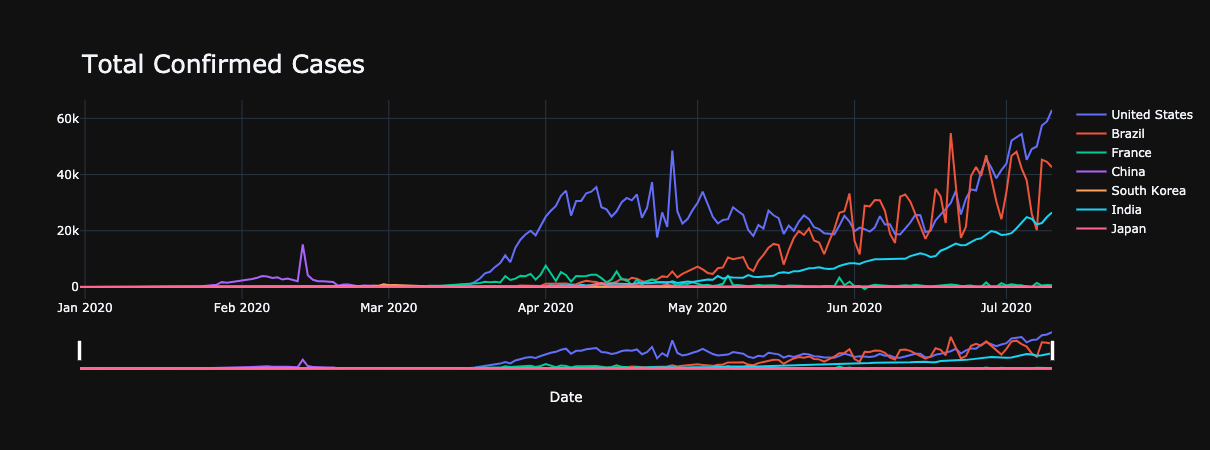

In [92]:
countries = ['USA', 'BRA', 'FRA', 'CHN', 'KOR', 'IND', 'JPN']
vari = 'new_cases'

import plotly.io as pio
pio.templates.default = "plotly_dark"

temp = covid_dat[covid_dat['iso_code'].isin(countries)]

fig = go.Figure()

for count in countries:
    x = temp['date'][temp['iso_code']==count]
    y = temp[vari][temp['iso_code']==count]
    fig.add_trace(go.Scatter(x=x, y=y, 
                        mode='lines',
                        name=temp['location'][temp['iso_code']==count].values[0]
                            )
                 )

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(#yaxis_type='log',
                 xaxis_title="Date",
                 #yaxis_title='',
                 annotations = [dict(xref='paper', yref='paper', x=0, y=1.1,
                              xanchor='left', yanchor='bottom',
                              text='Total Confirmed Cases',
                              font=dict(size=25),
                              showarrow=False)])
fig.show()